In [127]:
import glob
import random
import matplotlib.pyplot as plt


def get_random_image(dir):
    folder = f"./data/chest_xray/{dir}/*.jpeg"  
    image_paths = glob.glob(folder)
    max_length = len(image_paths)
    random_number = random.randint(0, max_length)
    for index, item in enumerate(image_paths, start=1):
        if index == random_number:
            print(index,item)
            image = plt.imread(item)
            ready_image=plt.imshow(image)
            plt.show()
            return ready_image


1629 ./data/chest_xray/train/train_pneumonia818.jpeg


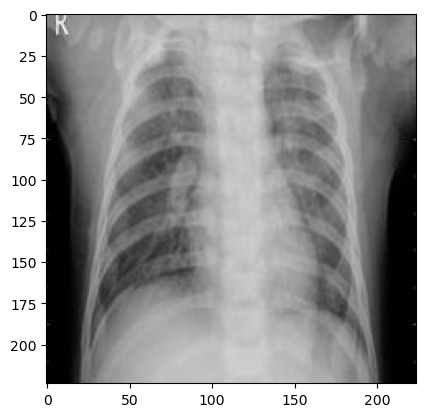

In [128]:
get_random_image("train")

In [129]:
from PIL import Image

def format_image_filenames(dir):
    folder = f"./data/chest_xray/{dir}/*/*.jpeg"
    
    counter_pneumonia = 0
    counter_normal = 0
    
    image_paths = glob.glob(folder)
    
    for img in image_paths:
        full_size_image = Image.open(img)
        image = full_size_image.resize((224,224))
        if "person" in img:
            plt.imsave(fname = f"./data/chest_xray/{dir}/train_pneumonia"+str(counter_pneumonia)+'.jpeg', arr=image,format = "jpeg", cmap = 'gray')
            counter_pneumonia+=1
        else:
            plt.imsave(fname=f"./data/chest_xray/{dir}/train_normal"+str(counter_normal)+'.jpeg', arr=image,format="jpeg", cmap='gray')
            counter_normal+=1

In [130]:
image_filenames = ['train','test','val']

for filename in image_filenames:    
    format_image_filenames(filename)

In [131]:
import pandas as pd

folder = "./data/chest_xray/*/*.jpeg"

category = []
condition_of_lung = []
filenames = []

all_files = glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        category.append("train")
    elif "test" in filename:
        category.append("test")
    else:
        category.append("val")

    filenames.append(filename)

    if "pneumonia" in filename:
        condition_of_lung.append("pneumonia")
    elif "normal" in filename:
        condition_of_lung.append("normal")

all_data_df = pd.DataFrame({"dataset type":category, "x-ray result":condition_of_lung,"filename":filenames})
print(all_data_df.head())

  dataset type x-ray result                                       filename
0         test       normal     ./data/chest_xray/test/test_normal215.jpeg
1         test    pneumonia  ./data/chest_xray/test/test_pneumonia182.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia301.jpeg
3         test       normal      ./data/chest_xray/test/test_normal28.jpeg
4         test    pneumonia  ./data/chest_xray/test/test_pneumonia244.jpeg


In [132]:
print(category[0])
print(condition_of_lung[0])
print(filenames[0])

test
normal
./data/chest_xray/test/test_normal215.jpeg


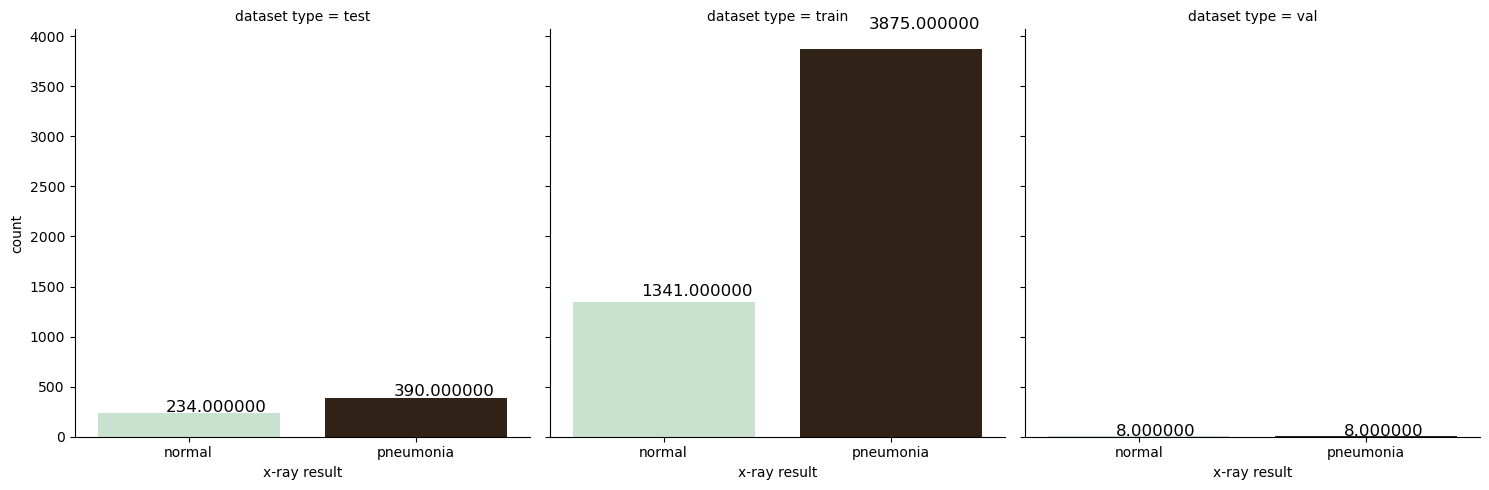

In [133]:
import seaborn as sns

bar_graph = sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:55",data=all_data_df,legend=True)

for i in range(0,3):
    ax = bar_graph.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,p.get_height()*1.05,'{0:0f}'.format(p.get_height()),color="black",rotation="horizontal",size="large")